<a href="https://colab.research.google.com/github/BrianKEverett/County-Line/blob/main/C24_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
import time, os, sys, re
import zipfile, json, datetime, string
import numpy as np
from statistics import *

import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
import plotly.express as px

import missingno as msno

from google.colab import files

import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

plt.style.use('classic')

In [ ]:
events24=pd.read_csv ("https://raw.githubusercontent.com/BrianKEverett/County-Line/main/Class24.engagement.csv")
grades24=pd.read_csv ("https://raw.githubusercontent.com/BrianKEverett/County-Line/main/class24.grades.csv")

In [ ]:
del events24['RUC EMAIL']
del events24['First']
del events24['Last']
del events24['Unnamed: 10']
del events24['fall 18']

del grades24['Last Name']
del grades24['First Name']
del grades24['Notes']
del grades24['Follow-up']
del grades24['PWB']

In [ ]:
#Edits for events24,
#Spring 2023
events24['Spring 2023'] = events24['Spring 2023'].str.replace('approved', '1')
events24['Spring 2023'] = events24['Spring 2023'].str.replace('no form', '0')
events24['Spring 2023'] = events24['Spring 2023'].str.replace('denied', '0')
events24['Spring 2023'] = events24['Spring 2023'].str.replace('Study Abroad', '1')
events24['Spring 2023'] = events24['Spring 2023'].str.replace('study abroad', '1')

#Fall 2022
events24['Fall 2022'] = events24['Fall 2022'].str.replace('Approved', '1')
events24['Fall 2022'] = events24['Fall 2022'].str.replace('PWB', '1')
events24['Fall 2022'] = events24['Fall 2022'].str.replace('no form', '0')
events24['Fall 2022'] = events24['Fall 2022'].str.replace('approved', '1')

#spring 2022
#forgiveness is marked as zero (0)
events24['spring 2022'] = events24['spring 2022'].str.replace('approved', '1')
events24['spring 2022'] = events24['spring 2022'].str.replace('no form', '0')
events24['spring 2022'] = events24['spring 2022'].str.replace('forgiveness', '0')
events24['spring 2022'] = events24['spring 2022'].str.replace('denied/0', '0')
events24['spring 2022'] = events24['spring 2022'].str.replace('denied', '0')
events24['spring 2022'] = events24['spring 2022'].str.replace('PWB', '1')

#Fall 2021
events24['Fall 2021'] = events24['Fall 2021'].str.replace('approved', '1')
events24['Fall 2021'] = events24['Fall 2021'].str.replace('no form', '0')
events24['Fall 2021'] = events24['Fall 2021'].str.replace('sp 22 tr', '0')

#Spring 2021
events24['Spring 2021'] = events24['Spring 2021'].str.replace('Approved', '1')
events24['Spring 2021'] = events24['Spring 2021'].str.replace('No Form', '0')
events24['Spring 2021'] = events24['Spring 2021'].str.replace('approved', '1')
events24['Spring 2021'] = events24['Spring 2021'].str.replace('no form', '0')

#Fall 2020
events24['Fall 2020 '] = events24['Fall 2020 '].str.replace('Approved', '1')
events24['Fall 2020 '] = events24['Fall 2020 '].str.replace('No Form', '0')
events24['Fall 2020 '] = events24['Fall 2020 '].str.replace('no form', '0')
events24['Fall 2020 '] = events24['Fall 2020 '].str.replace('withdrew', '0')

#sp 20
events24['sp 20'] = events24['sp 20'].str.replace('Approved', '1')
events24['sp 20'] = events24['sp 20'].str.replace('Denied', '0')
events24['sp 20'] = events24['sp 20'].str.replace('good', '1')

#fall 19
events24['fall 19'] = events24['fall 19'].str.replace('Approved', '1')
events24['fall 19'] = events24['fall 19'].str.replace('forgiveness', '0')

#spring 19
events24['spring 19'] = events24['spring 19'].str.replace('Approved', '1')

events24['Spring 2023'] = events24['Spring 2023'].fillna(0)
events24['Fall 2022'] = events24['Fall 2022'].fillna(0)
events24['spring 2022'] = events24['spring 2022'].fillna(0)
events24['Fall 2021'] = events24['Fall 2021'].fillna(0)
events24['Spring 2021'] = events24['Spring 2021'].fillna(0)
events24['Fall 2020 '] = events24['Fall 2020 '].fillna(0)
events24['sp 20'] = events24['sp 20'].fillna(0)
events24['fall 19'] = events24['fall 19'].fillna(0)
events24['spring 19'] = events24['spring 19'].fillna(0)

In [ ]:
events24
grades24

,RUID,Spring 2023,Fall 2022,spring 2022,Fall 2021,Spring 2021,Fall 2020,sp 20,fall 19,spring 19
0,205003850.0,1,1,1,1,1,1,0,0,0
1,200003368.0,1,1,0,0,0,0,0,0,0
2,201006596.0,0,1,1,1,0,0,0,0,0
3,198008917.0,1,1,1,1,1,1,0,0,0
4,199004180.0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
69,219005147.0,1,1,0,0,0,0,0,0,0
70,194000000.0,1,1,1,1,1,1,1,0,0
71,199006783.0,1,1,0,1,1,1,0,0,0
72,199006918.0,1,1,1,1,1,1,0,0,0


,RUID,School Code,Type,Major,DEGREE CREDITS,TERM CREDITS ATTEMPTED,Term Credits Earned,Term GPA,Cum. GPA
0,200005156,50,FY,202/830,74.0,15.0,15.0,1.000,2.200
1,202007245,57,FY,705,94.0,12.0,6.0,1.750,3.513
2,199008726,50,FY,160,122.0,15.0,15.0,1.933,3.046
3,199006783,57,FY,705,96.0,12.0,3.0,2.000,3.704
4,202001380,50,RS,220,72.0,18.0,18.0,2.083,2.977
...,...,...,...,...,...,...,...,...,...
75,202009131,50,FY,830/920,101.0,16.0,16.0,4.000,4.000
76,219006730,50,TR,202,100.0,17.5,16.0,4.000,4.000
77,203000628,50,FY,220,103.0,13.0,13.0,4.040,4.000
78,205003850,50,FY,350/420,115.0,NaN,NaN,NaN,NaN


##edit text within columns for missing values in Engagement data set
then do the merge...

In [ ]:
class24 = events24.merge(grades24, how='inner', on=['RUID'])
class24

,RUID,Spring 2023,Fall 2022,spring 2022,Fall 2021,Spring 2021,Fall 2020,sp 20,fall 19,spring 19,School Code,Type,Major,DEGREE CREDITS,TERM CREDITS ATTEMPTED,Term Credits Earned,Term GPA,Cum. GPA
0,205003850.0,1,1,1,1,1,1,0,0,0,50,FY,350/420,115.0,NaN,NaN,NaN,NaN
1,200003368.0,1,1,0,0,0,0,0,0,0,50,TR,830,93.0,18.0,18.0,4.000,4.000
2,201006596.0,0,1,1,1,0,0,0,0,0,50,RS,120,88.0,14.0,14.0,4.000,3.926
3,198008917.0,1,1,1,1,1,1,0,0,0,50,FY,910,106.0,15.0,9.0,4.000,4.000
4,199004180.0,1,1,0,0,0,0,0,0,0,50,TR,830,90.0,15.0,15.0,3.800,3.800
5,203000314.0,1,1,1,1,0,0,0,0,0,50,RS,790,92.0,16.5,16.5,4.000,4.000
6,200007734.0,1,1,1,1,1,1,0,0,0,50,FY,120,114.0,14.5,14.5,4.000,3.939
7,220004232.0,1,1,0,0,0,0,0,0,0,50,TR,910,92.0,16.0,16.0,3.906,3.953
8,204002013.0,1,1,1,1,1,1,0,0,0,50,FY,499,106.0,13.0,13.0,4.000,3.929
9,203000628.0,1,1,1,1,1,1,0,0,0,50,FY,220,103.0,13.0,13.0,4.040,4.000


In [ ]:
class24 = class24.rename(columns={'spring 2022': 'Spring 2022'})

In [ ]:
class24["Spring 2023"] = pd.to_numeric(class24["Spring 2023"])
class24["Term GPA"] = pd.to_numeric(class24["Term GPA"])
class24["Fall 2022"]= pd.to_numeric(class24["Fall 2022"])
class24["Spring 2022"]= pd.to_numeric(class24["Spring 2022"])
class24["Fall 2021"]= pd.to_numeric(class24["Fall 2021"])
class24["Spring 2021"]= pd.to_numeric(class24["Spring 2021"])


In [ ]:
class24[['Term GPA', 'Spring 2023']]

,Term GPA,Spring 2023
0,NaN,1
1,4.000,1
2,4.000,0
3,4.000,1
4,3.800,1
5,4.000,1
6,4.000,1
7,3.906,1
8,4.000,1
9,4.040,1


In [ ]:
pd.crosstab(class24['Term GPA'], class24['Spring 2023'])

Spring 2023,0,1
Term GPA,,
1.750,0,1
1.933,0,1
2.000,0,1
2.233,0,1
2.375,0,1
2.500,1,0
2.750,0,1
2.815,0,1
3.000,0,2


In [ ]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(class24['Term GPA'], class24['Spring 2023']))
p

0.024241157002184353

In general, this suggests a statistically significant result that the two variables are correlated.

In [ ]:
class24

,RUID,Spring 2023,Fall 2022,Spring 2022,Fall 2021,Spring 2021,Fall 2020,sp 20,fall 19,spring 19,School Code,Type,Major,DEGREE CREDITS,TERM CREDITS ATTEMPTED,Term Credits Earned,Term GPA,Cum. GPA
0,205003850.0,1,1,1,1,1,1,0,0,0,50,FY,350/420,115.0,NaN,NaN,NaN,NaN
1,200003368.0,1,1,0,0,0,0,0,0,0,50,TR,830,93.0,18.0,18.0,4.000,4.000
2,201006596.0,0,1,1,1,0,0,0,0,0,50,RS,120,88.0,14.0,14.0,4.000,3.926
3,198008917.0,1,1,1,1,1,1,0,0,0,50,FY,910,106.0,15.0,9.0,4.000,4.000
4,199004180.0,1,1,0,0,0,0,0,0,0,50,TR,830,90.0,15.0,15.0,3.800,3.800
5,203000314.0,1,1,1,1,0,0,0,0,0,50,RS,790,92.0,16.5,16.5,4.000,4.000
6,200007734.0,1,1,1,1,1,1,0,0,0,50,FY,120,114.0,14.5,14.5,4.000,3.939
7,220004232.0,1,1,0,0,0,0,0,0,0,50,TR,910,92.0,16.0,16.0,3.906,3.953
8,204002013.0,1,1,1,1,1,1,0,0,0,50,FY,499,106.0,13.0,13.0,4.000,3.929
9,203000628.0,1,1,1,1,1,1,0,0,0,50,FY,220,103.0,13.0,13.0,4.040,4.000


In [ ]:
del class24['School Code']
del class24['DEGREE CREDITS']
del class24['TERM CREDITS ATTEMPTED']
del class24['Term Credits Earned']
del class24['RUID']

<ipython-input-389-28acc60d6816>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = class24.corr()


<Figure size 800x800 with 0 Axes>

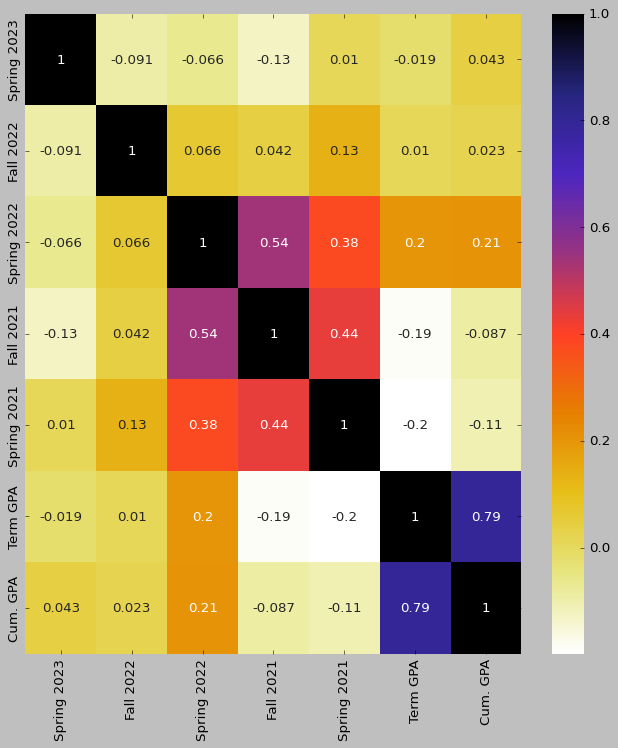

<Figure size 640x480 with 0 Axes>

In [ ]:
corrmat = class24.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(class24[top_corr_features].corr(),annot=True , cmap=plt.cm.CMRmap_r)
plt.show()
plt.savefig('engagementcorr.pdf')

#First do groupby via Engagement or no Engagement in Spring 2023
Then do barplot for yes Engagement or no Engagement compared to GPA

In [ ]:
class24

,Spring 2023,Fall 2022,Spring 2022,Fall 2021,Spring 2021,Fall 2020,sp 20,fall 19,spring 19,Type,Major,Term GPA,Cum. GPA
0,1,1,1,1,1,1,0,0,0,FY,350/420,NaN,NaN
1,1,1,0,0,0,0,0,0,0,TR,830,4.000,4.000
2,0,1,1,1,0,0,0,0,0,RS,120,4.000,3.926
3,1,1,1,1,1,1,0,0,0,FY,910,4.000,4.000
4,1,1,0,0,0,0,0,0,0,TR,830,3.800,3.800
5,1,1,1,1,0,0,0,0,0,RS,790,4.000,4.000
6,1,1,1,1,1,1,0,0,0,FY,120,4.000,3.939
7,1,1,0,0,0,0,0,0,0,TR,910,3.906,3.953
8,1,1,1,1,1,1,0,0,0,FY,499,4.000,3.929
9,1,1,1,1,1,1,0,0,0,FY,220,4.040,4.000
